In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("C:\\Users\\admin\\Desktop\\simple linear regression\\salary_data.csv")

In [3]:
data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [5]:
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


# Correlation

In [6]:
data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


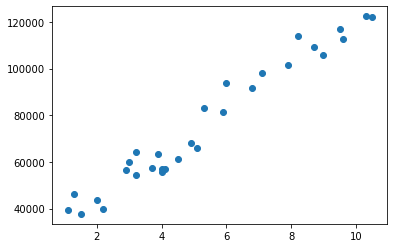

In [7]:
plt.scatter(data['YearsExperience'],data['Salary'])

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

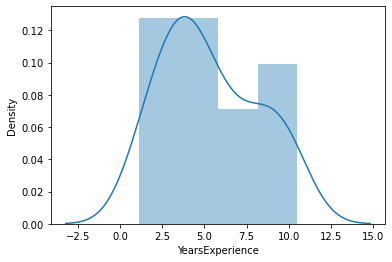

In [8]:
sns.distplot(data['YearsExperience'])

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Salary', ylabel='Density'>

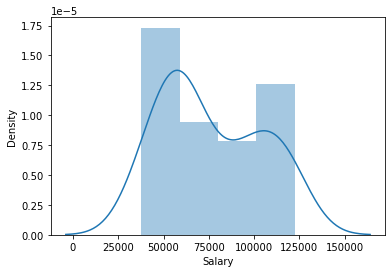

In [9]:
sns.distplot(data['Salary'])

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

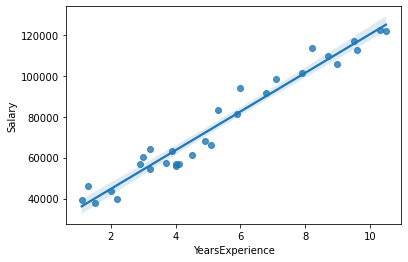

In [10]:
sns.regplot(x= "YearsExperience",y= "Salary",data=data)

# Fitting a Linear Regression Model

In [16]:
import statsmodels.formula.api as smf
model1 = smf.ols("Salary~YearsExperience",data=data).fit()

In [17]:
model1.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [20]:
print(model1.tvalues, '\n',model1.pvalues)

Intercept          11.346940
YearsExperience    24.950094
dtype: float64 
 Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64


In [21]:
(model1.rsquared,model.rsquared_adj)

(0.9569566641435086, 0.9554194021486339)

In [22]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Thu, 04 Aug 2022   Prob (F-statistic):           1.14e-20
Time:                        14:14:12   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
model2= smf.ols("np.log(Salary)~np.log(YearsExperience)",data=data).fit()

In [26]:
print(model2.params,'\n''\n', model2.pvalues)

Intercept                  10.328043
np.log(YearsExperience)     0.562089
dtype: float64 

 Intercept                  9.073132e-45
np.log(YearsExperience)    7.395278e-16
dtype: float64


In [27]:
(model2.rsquared,model2.rsquared_adj)

(0.9052150725817149, 0.9018298966024904)

In [28]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(Salary)   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     267.4
Date:                Thu, 04 Aug 2022   Prob (F-statistic):           7.40e-16
Time:                        14:19:36   Log-Likelihood:                 23.209
No. Observations:                  30   AIC:                            -42.42
Df Residuals:                      28   BIC:                            -39.61
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  10.3280      0.056    184.868      0.000      10.214      10.442
np.log(YearsExperience)     0.5621      0.034     16.353      0.000       0.492       0.632
==============================================================================
Omnibus:                        0.102   Durbin-Watson:                   0.988
Prob(Omnibus):                  0.950   Jarque-Bera (JB):                0.297
Skew:                           0.093   Prob(JB):                        0.862
Kurtosis:                       2.549   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
model3= smf.ols("Salary~np.log(YearsExperience)",data=data).fit()

In [30]:
print(model3.params,'\n''\n', model3.tvalues,'\n''\n', model3.pvalues)

Intercept                  14927.97177
np.log(YearsExperience)    40581.98796
dtype: float64 

 Intercept                   2.895135
np.log(YearsExperience)    12.791989
dtype: float64 

 Intercept                  7.268813e-03
np.log(YearsExperience)    3.250155e-13
dtype: float64


In [31]:
(model3.rsquared,model3.rsquared_adj)

(0.8538888828756969, 0.8486706286926861)

In [32]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     163.6
Date:                Thu, 04 Aug 2022   Prob (F-statistic):           3.25e-13
Time:                        14:22:27   Log-Likelihood:                -319.77
No. Observations:                  30   AIC:                             643.5
Df Residuals:                      28   BIC:                             646.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                1.493e+04   5156.226      2.895      0.007    4365.921    2.55e+04
np.log(YearsExperience)  4.058e+04   3172.453     12.792      0.000    3.41e+04    4.71e+04
==============================================================================
Omnibus:                        1.094   Durbin-Watson:                   0.512
Prob(Omnibus):                  0.579   Jarque-Bera (JB):                0.908
Skew:                           0.156   Prob(JB):                        0.635
Kurtosis:                       2.207   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
model4= smf.ols("Salary~np.sqrt(YearsExperience)",data=data).fit()

In [34]:
print(model4.params,'\n''\n', model4.tvalues,'\n''\n', model4.pvalues)

Intercept                  -16055.769117
np.sqrt(YearsExperience)    41500.680583
dtype: float64 

 Intercept                   -3.262308
np.sqrt(YearsExperience)    19.437148
dtype: float64 

 Intercept                   2.906965e-03
np.sqrt(YearsExperience)    8.565358e-18
dtype: float64


In [35]:
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     377.8
Date:                Thu, 04 Aug 2022   Prob (F-statistic):           8.57e-18
Time:                        14:23:26   Log-Likelihood:                -308.52
No. Observations:                  30   AIC:                             621.0
Df Residuals:                      28   BIC:                             623.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                -1.606e+04   4921.599     -3.262      0.003   -2.61e+04   -5974.331
np.sqrt(YearsExperience)   4.15e+04   2135.122     19.437      0.000    3.71e+04    4.59e+04
==============================================================================
Omnibus:                        0.588   Durbin-Watson:                   1.031
Prob(Omnibus):                  0.745   Jarque-Bera (JB):                0.638
Skew:                           0.011   Prob(JB):                        0.727
Kurtosis:                       2.286   Cond. No.                         9.97
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
data1=model1.predict(data)
data1

0     10.381616
1     10.475515
2     10.555951
3     10.717653
4     10.771226
5     10.926505
6     10.945561
7     10.981837
8     10.981837
9     11.063442
10    11.093033
11    11.107264
12    11.107264
13    11.121143
14    11.173468
15    11.221335
16    11.243821
17    11.265443
18    11.325724
19    11.335171
20    11.405524
21    11.429791
22    11.489804
23    11.510753
24    11.544023
25    11.563079
26    11.593469
27    11.599355
28    11.638915
29    11.649725
dtype: float64

In [37]:
data=pd.concat([data,data1],axis=1)
data

,YearsExperience,Salary,0
0,1.1,39343.0,10.381616
1,1.3,46205.0,10.475515
2,1.5,37731.0,10.555951
3,2.0,43525.0,10.717653
4,2.2,39891.0,10.771226
5,2.9,56642.0,10.926505
6,3.0,60150.0,10.945561
7,3.2,54445.0,10.981837
8,3.2,64445.0,10.981837
9,3.7,57189.0,11.063442


Frome all above 1st model is suitable